### Assignment 3 Part 1
### This is a skeleton & instruction notebook
- ### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ### Describe the behavior you see in the plots in terms of the law of large numbers.
- ### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Choose which distributions to use and which mean to give it.

In [2]:
distributions = ['chisq', 'norm', 'pois', 'binom', 'logistic']
mymean = 100

In [3]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

In [4]:
# dictionary with distributions
md = {}.fromkeys(distributions)

In [5]:
# set seed
np.random.seed(1)

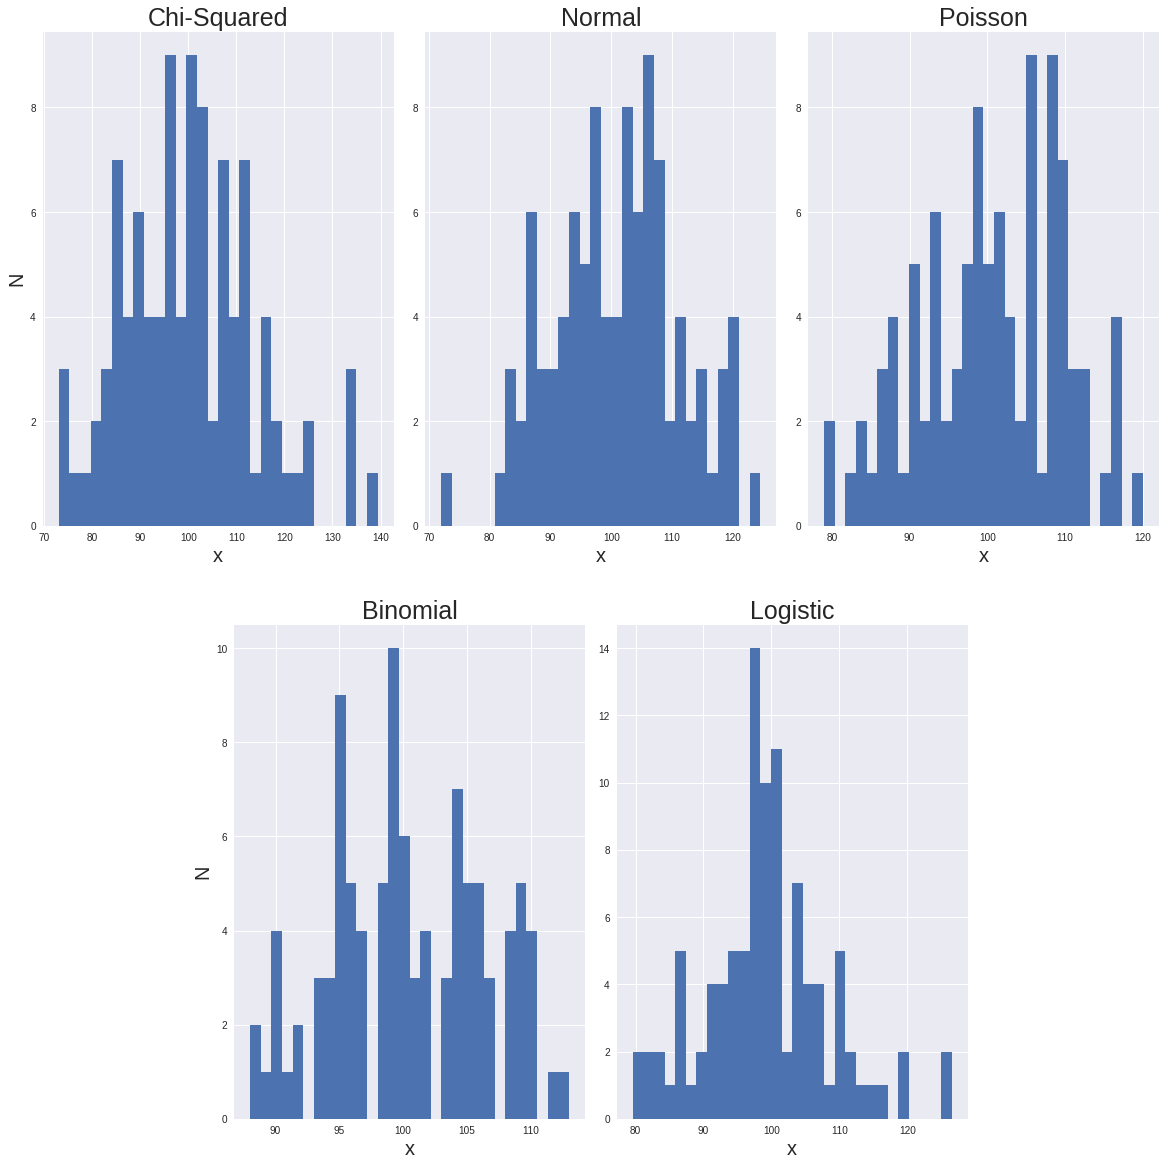

In [6]:
fig = plt.figure(figsize=(20,20))

md['chisq'] = np.random.chisquare(df, size=100)
plt.subplot2grid((2,6), (0,0), colspan=2)
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N', fontsize = 20)
pl.xlabel('x', fontsize = 20)
pl.title('Chi-Squared', fontsize = 25)

md['norm'] = np.random.normal(mymean, 10, size=100)
pl.subplot2grid((2,6), (0,2), colspan=2)
pl.hist(md['norm'], bins = 30)
pl.xlabel('x', fontsize = 20)
pl.title('Normal', fontsize = 25)

md['pois'] = np.random.poisson(mymean, size=100)
plt.subplot2grid((2,6), (0,4), colspan=2)
pl.hist(md['pois'], bins = 30)
pl.xlabel('x', fontsize = 20)
pl.title('Poisson', fontsize = 25)

md['binom'] = np.random.binomial(mymean*2, .5, size=100)
plt.subplot2grid((2,6), (1,1), colspan=2)
pl.hist(md['binom'], bins = 30)
pl.ylabel('N', fontsize = 20)
pl.xlabel('x', fontsize = 20)
pl.title('Binomial', fontsize = 25)

md['logistic'] = np.random.logistic(mymean, 5, size=100)
plt.subplot2grid((2,6), (1,3), colspan=2)
pl.hist(md['logistic'], bins = 30)
pl.xlabel('x', fontsize = 20)
pl.title('Logistic', fontsize = 25);

#### Figure 1: 
5 selected statistical distributions (Chi-squared, Normal, Poisson, Binomial, and Logistic). Each distribution has 100 samples and a population mean of 100.

## Calculate the mean and stdev of each distribution.

In [7]:
print ("Chi-sq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['norm'].mean(), md['norm'].std()))
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binom'].mean(), md['binom'].std()))
print ("Logistic mean: %.2f, standard deviation: %.2f"%(md['logistic'].mean(), md['logistic'].std()))

Chi-sq mean: 100.36, standard deviation: 13.83
Normal mean: 100.98, standard deviation: 10.35
Poisson mean: 100.54, standard deviation: 9.08
Binomial mean: 100.30, standard deviation: 6.02
Logistic mean: 99.31, standard deviation: 9.14


## Now for 100 distributions:
we want distributions of different sizes (all integers between 10 and 2000)

In [8]:
#mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[328 547 220 671 142  94 870 236 386 571 525  76 874 951 812 283 527 339
 554 974 311 668 325 774 325 889 751 762 469 210  41 321  37 693 670 430
 767 536  39 134 193 335  52 605 512 617 432 847 454  15 873 656 823 951
  50 235  63 421 863  81 473 125 772 841  43 486 239 952 943 613 973 344
 897 434 235 940 684  64 870 701 604 732 253 600 814  54 130 842 618 531
 248 295 872 421  64 896 203 826 881 486] (100,)


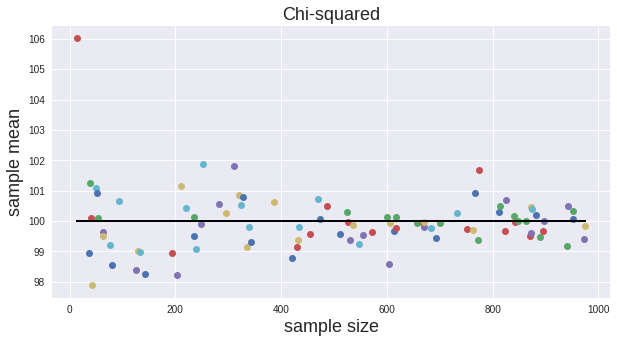

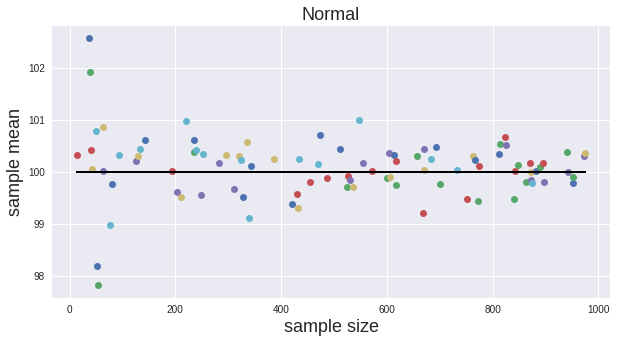

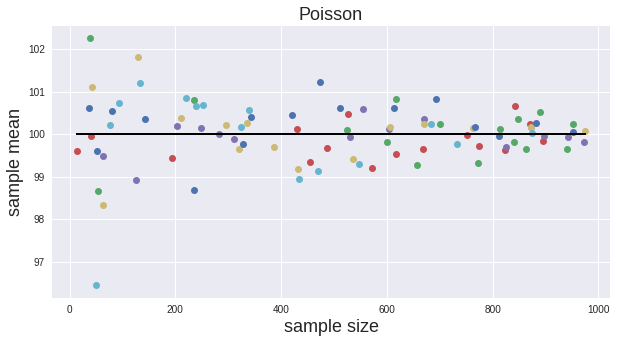

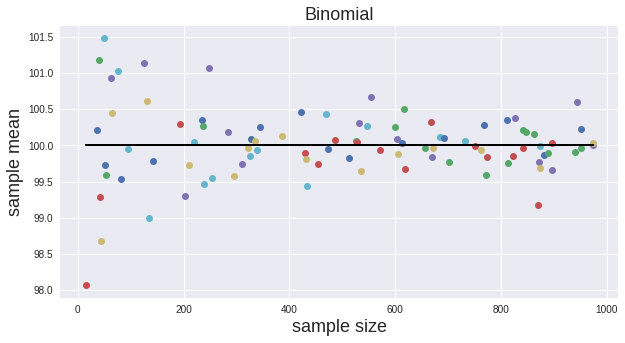

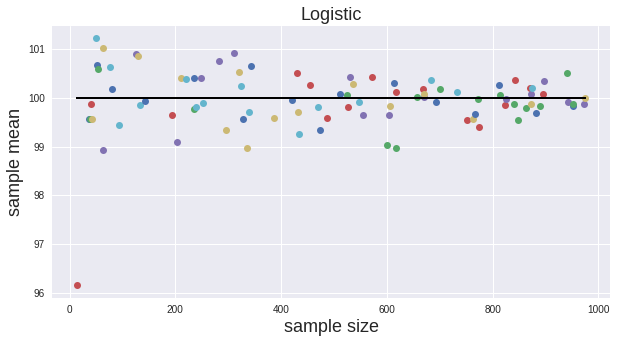

In [9]:
# Overwrites the dictionary entries created above,
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

for dist in md:
    md[dist] = {}

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    md['norm'][n] = np.random.normal(mymean, 10, size=n)
    md['pois'][n] = np.random.poisson(mymean, size = n)
    md['binom'][n] = np.random.binomial(mymean*2, .5, size=n)
    md['logistic'][n] = np.random.logistic(mymean, 5, size = n)
    
# save the means for plotting later    

for dist in md:
    md[dist]['means'] = {}

axchisq_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)
for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi-squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

axnorm_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)        
for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, md['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
        

axpois_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)
for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')   

axbinom_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)
for nn in md['binom']:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        axbinom_mu_n.plot(nn, md['binom']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Binomial', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

axlogistic_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)
for nn in md['logistic']:
    if not type(nn) == str:
        md['logistic']['means'][nn] = md['logistic'][nn].mean()
        axlogistic_mu_n.plot(nn, md['logistic']['means'][nn], 'o')
        axlogistic_mu_n.set_xlabel('sample size', fontsize=18)
        axlogistic_mu_n.set_ylabel('sample mean', fontsize=18)
        axlogistic_mu_n.set_title('Logistic', fontsize=18)
        axlogistic_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 2:
Plots of sample means vs. sample sizes for 100 of each statistical distribution. The sample means appear to be distributed across the population mean.

# Now the histogram of the mean of all samples: 

In [10]:
allmeans= {}.fromkeys(distributions)

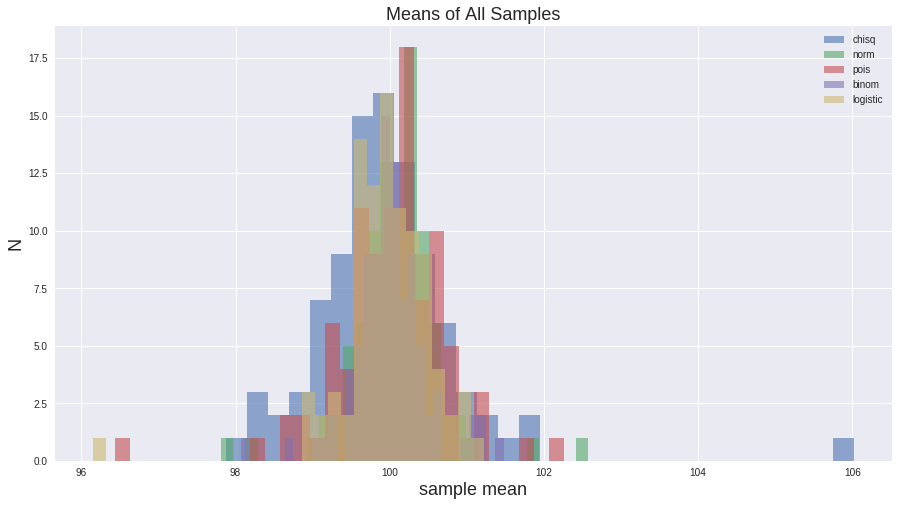

In [11]:
pl.figure(figsize = (15,8))
for dist in distributions: 
    allmeans[dist] = list(md[dist]['means'].values())
    pl.hist(allmeans[dist], bins =30, alpha = 0.6)
    pl.xlabel('sample mean',fontsize =18)
    pl.ylabel('N', fontsize = 18)
    pl.title('Means of All Samples', fontsize = 18)
    pl.legend(distributions)

### Figure 3.
Histogram of the means of all distributions. This demonstrates the Central Limit Theorem, where the means of each sample for each distribution approximate the normal (Gaussian) distribution.